# Lab 2-2

Chayarob Chantrapiwat 64070501015

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## 1. Histogram Matching

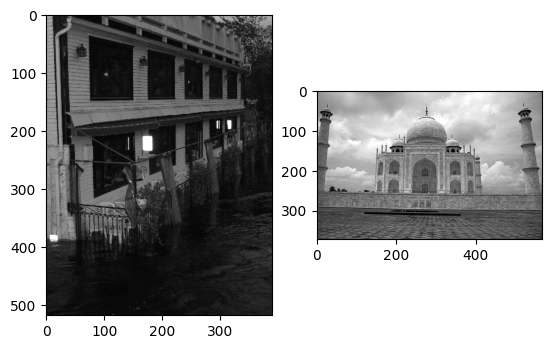

In [2]:
input_image = cv2.imread('flood.jpg', cv2.IMREAD_GRAYSCALE) # Read input image
match_image = cv2.imread('tajmahal.jpg', cv2.IMREAD_GRAYSCALE) # Read match image

# Display input and match image
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.subplot(1, 2, 2)   
plt.imshow(match_image, cmap='gray')
plt.show() 

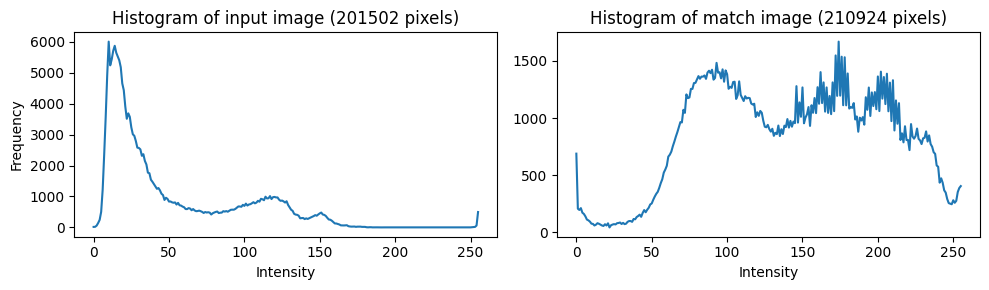

In [3]:
histogram_input = np.histogram(input_image, bins=256, range=(0, 255))[0] # Calculate histogram of input image
histogram_match = np.histogram(match_image, bins=256, range=(0, 255))[0] # Calculate histogram of match image

total_pixel_input = np.sum(histogram_input) # Calculate total number of pixels in input image
total_pixel_match = np.sum(histogram_match) # Calculate total number of pixels in match image

f, axs = plt.subplots(1, 2, figsize=(10, 3)) # Create subplots

axs[0].plot(histogram_input) # Plot histogram of input image
axs[0].set_title(f'Histogram of input image ({total_pixel_input} pixels)')    
axs[0].set_xlabel('Intensity')
axs[0].set_ylabel('Frequency')

axs[1].plot(histogram_match) # Plot histogram of match image
axs[1].set_title(f'Histogram of match image ({total_pixel_match} pixels)')
axs[1].set_xlabel('Intensity')

plt.tight_layout()
plt.show() 

Calculate `Histogram Equalization Level`

In [4]:
def hist_equal_level(hist_img):
    total_pixel = np.sum(hist_img) # Calculate total number of pixels in image
    hist_img = hist_img / total_pixel # Normalize histogram
    hist_img = np.cumsum(hist_img) # Calculate cumulative sum of histogram
    return np.uint8(np.round(hist_img*255)) # Calculate equalized histogram

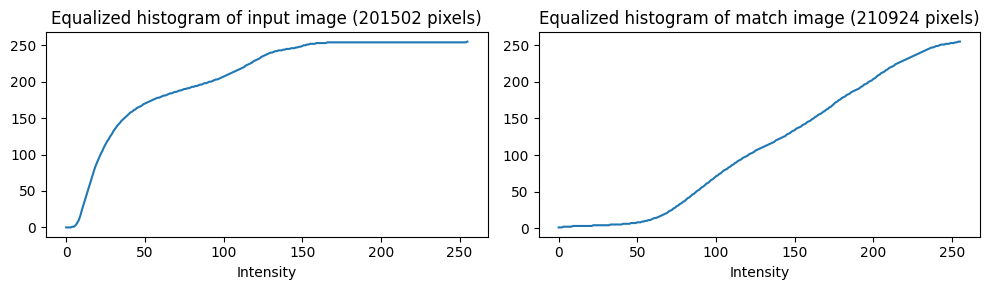

In [5]:
histogram_input_equalized = hist_equal_level(histogram_input) # Calculate equalized histogram of input image
histogram_match_equalized = hist_equal_level(histogram_match) # Calculate equalized histogram of match image


f, axs = plt.subplots(1, 2, figsize=(10, 3)) # Create subplots
axs[0].plot(histogram_input_equalized) # Plot equalized histogram of input image
axs[0].set_title(f'Equalized histogram of input image ({total_pixel_input} pixels)')
axs[0].set_xlabel('Intensity')

axs[1].plot(histogram_match_equalized) # Plot equalized histogram of match image
axs[1].set_title(f'Equalized histogram of match image ({total_pixel_match} pixels)')
axs[1].set_xlabel('Intensity')

plt.tight_layout()
plt.show() # Display subplots

Create mapping table 

In [6]:
mapping_table = np.zeros((256,)) # Initialize mapping table
for i in range(histogram_input_equalized.shape[0]): 
    mapping_table[i] = np.argmin(np.abs(histogram_match_equalized - histogram_input_equalized[i])) # Calculate mapping table

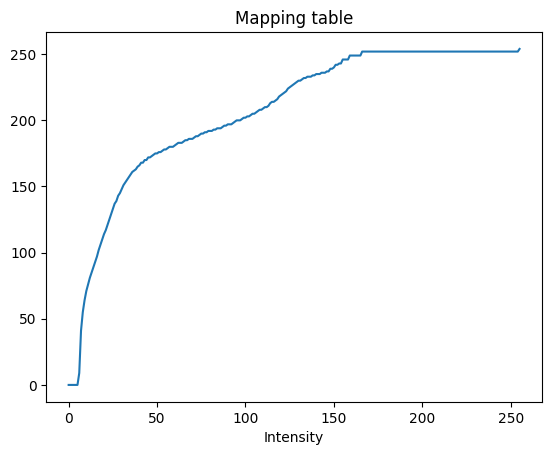

In [7]:
plt.plot(mapping_table) # Plot mapping table
plt.title('Mapping table')
plt.xlabel('Intensity')
plt.show() # Display plot

Apply mapping table to input image

In [8]:
transformed_image = np.zeros(input_image.shape)

for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
        transformed_image[i, j] = mapping_table[input_image[i, j]] # Transform input image using mapping table

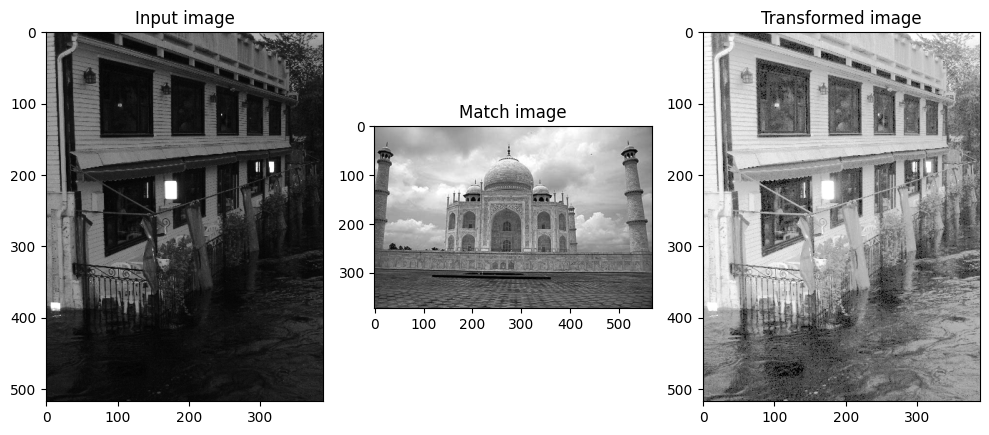

In [9]:
# Set figure size
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(input_image, cmap='gray') # Display input image
plt.title('Input image')

plt.subplot(1,3,2)
plt.imshow(match_image, cmap='gray') # Display transformed image
plt.title('Match image')

plt.subplot(1,3,3)
plt.imshow(transformed_image, cmap='gray') # Display match image
plt.title('Transformed image')


plt.tight_layout()
plt.show() # Display subplots